## Task 1: Import the ratings and movie metadata and explore it. 

The data is contained in two CSV files named `movies_metadata.csv` and `ratings.csv`

`movies_metadata` contains the following columns: 

- `movie_id`: Unique identifier of each movie. 
- `title`: Title of the movie. 
- `overview`: Short description of the movie. 
- `vote_average`: Average score the movie got.
- `vote_count`: Total number of votes the movie got. 

`ratings` contains the following columns: 

- `user_id`: Unique identifier of the person who rated the movie. 
- `movie_id`: Unique identifier of the movie. 
- `rating`: Value between 0 and 10 indicating how much the person liked the movie. 

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer


#Read the movies metadata file
movies_metadata = pd.read_csv("movies_metadata.csv")
#Read the user rating file
rating = pd.read_csv("ratings.csv")


In [95]:
movies_metadata.head()

,movie_id,title,overview,vote_average,vote_count
0,95765.0,Cinema Paradiso,"A filmmaker recalls his childhood, when he fel...",8.2,834.0
1,67116.0,The French Connection,Tough narcotics detective 'Popeye' Doyle is in...,7.4,435.0
2,80801.0,The Gods Must Be Crazy,Misery is brought to a small group of Sho in t...,7.1,251.0
3,96446.0,Willow,Fearful of a prophecy stating that a girl chil...,6.9,484.0
4,112697.0,Clueless,"Shallow, rich and socially successful Cher is ...",6.9,828.0


In [96]:
#function to describe the data 
def describe_data(df):
    
    print(f"Description of numerical column:\n {df.describe()}\n")
    print("="*50)
    try:
        print(f"\nDescription of catagorical column:\n {df.describe(include='O')}\n")
    except:
        print("There is no categorical columns")
    print("="*50)
    print(f"\nInformation of the data: \n{df.info()}\n")
    print("="*50)
    print(f"\n Shape of data : \n {df.shape}\n")
    print("="*50)
    print(f"\n Missing values: {df.isna().sum()}\n")
    print("="*50)
    print(f"\n Duplicate values : {df.duplicated().sum()}")

In [97]:
describe_data(movies_metadata)

Description of numerical column:
            movie_id  vote_average    vote_count
count  9.010000e+03   9010.000000   9010.000000
mean   4.716779e+05      6.364184    441.405771
std    7.268185e+05      1.031710    999.357265
min    4.170000e+02      0.000000      0.000000
25%    8.885875e+04      5.800000     29.000000
50%    1.196825e+05      6.500000     97.000000
75%    4.250440e+05      7.000000    368.000000
max    5.794766e+06     10.000000  14075.000000


Description of catagorical column:
          title            overview
count     9010                8998
unique    8740                8992
top     Hamlet  No overview found.
freq         5                   3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9010 entries, 0 to 9009
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      9010 non-null   float64
 1   title         9010 non-null   object 
 2   overview      8998 non-null   object 

In [98]:
describe_data(rating)

Description of numerical column:
             user_id      movie_id        rating
count  99793.000000  9.979300e+04  99793.000000
mean     346.978155  2.458532e+05      3.543209
std      195.167518  4.042449e+05      1.057939
min        1.000000  4.170000e+02      0.500000
25%      182.000000  9.382200e+04      3.000000
50%      367.000000  1.139720e+05      4.000000
75%      520.000000  1.962290e+05      4.000000
max      671.000000  5.794766e+06      5.000000

There is no categorical columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99793 entries, 0 to 99792
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   99793 non-null  int64  
 1   movie_id  99793 non-null  float64
 2   rating    99793 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.3 MB

Information of the data: 
None


 Shape of data : 
 (99793, 3)


 Missing values: user_id     0
movie_id    0
rating      0
dtype: int64


 Duplica

In [99]:
#count how many unique movies are there on movies_metadata dataframe
unique_movies = movies_metadata['movie_id'].nunique()
print(f"Number of unique movies : {unique_movies}")

#count how many unique userid and movie id are there on ratings dataframe
unique_users = rating['user_id'].nunique()
unique_rated_movies = rating['movie_id'].nunique()
print(f"Number of unique users: {unique_users}")
print(f"Number of Unique user rated movies: {unique_rated_movies}")

Number of unique movies : 9010
Number of unique users: 671
Number of Unique user rated movies: 9010


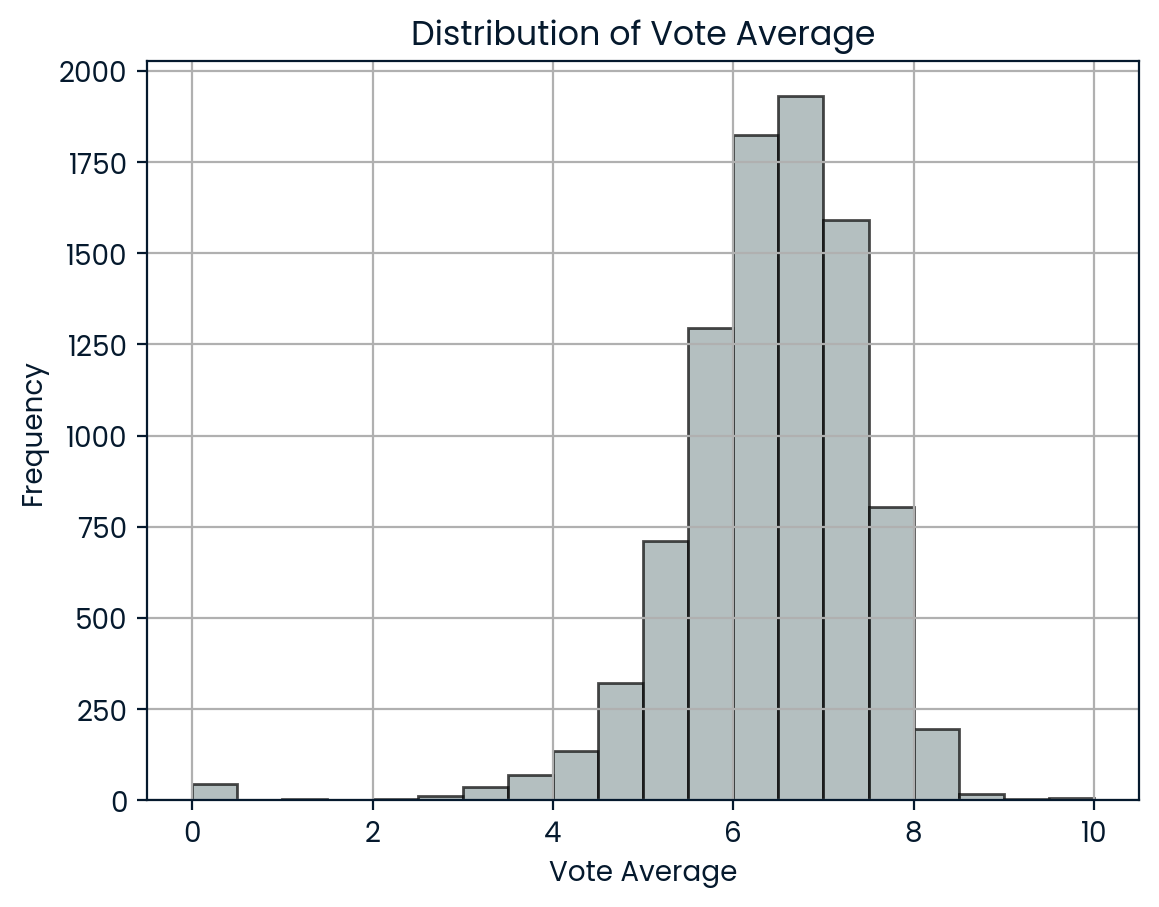

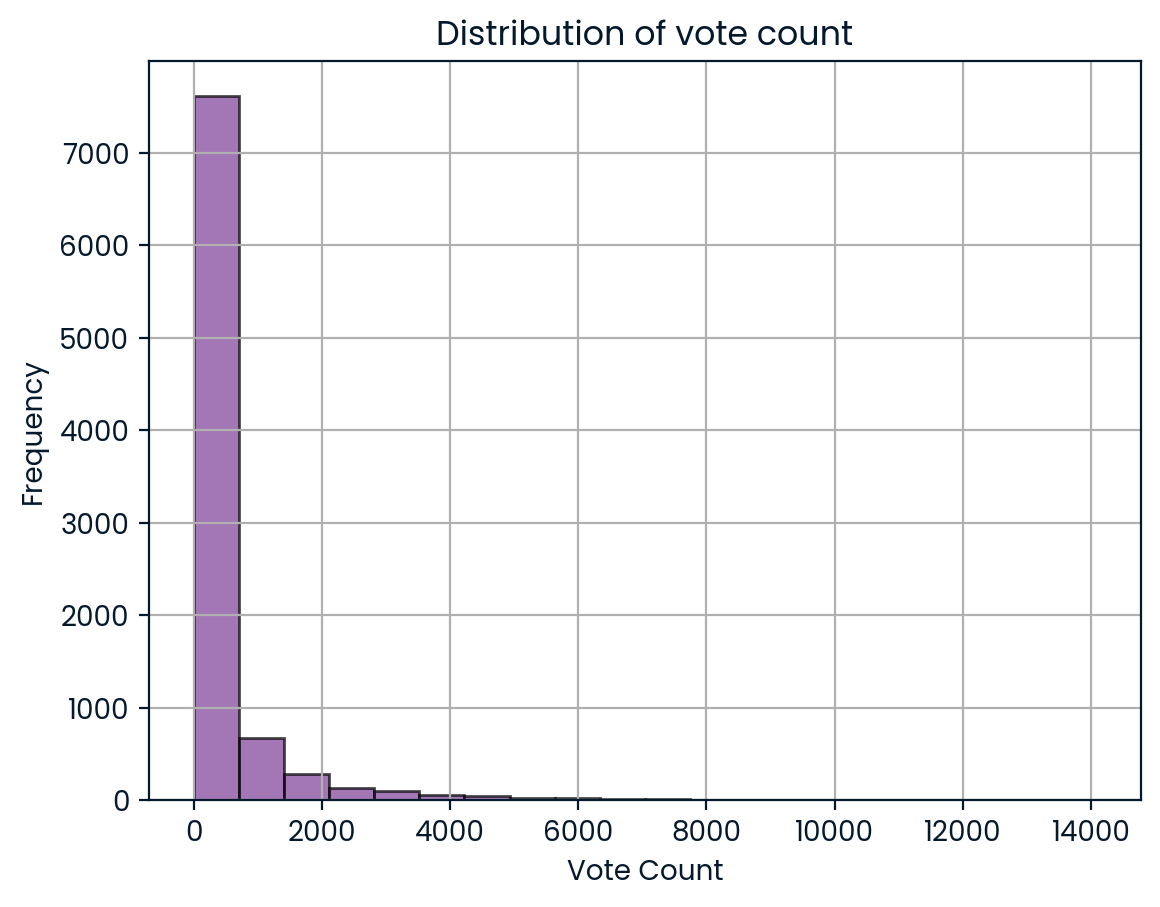

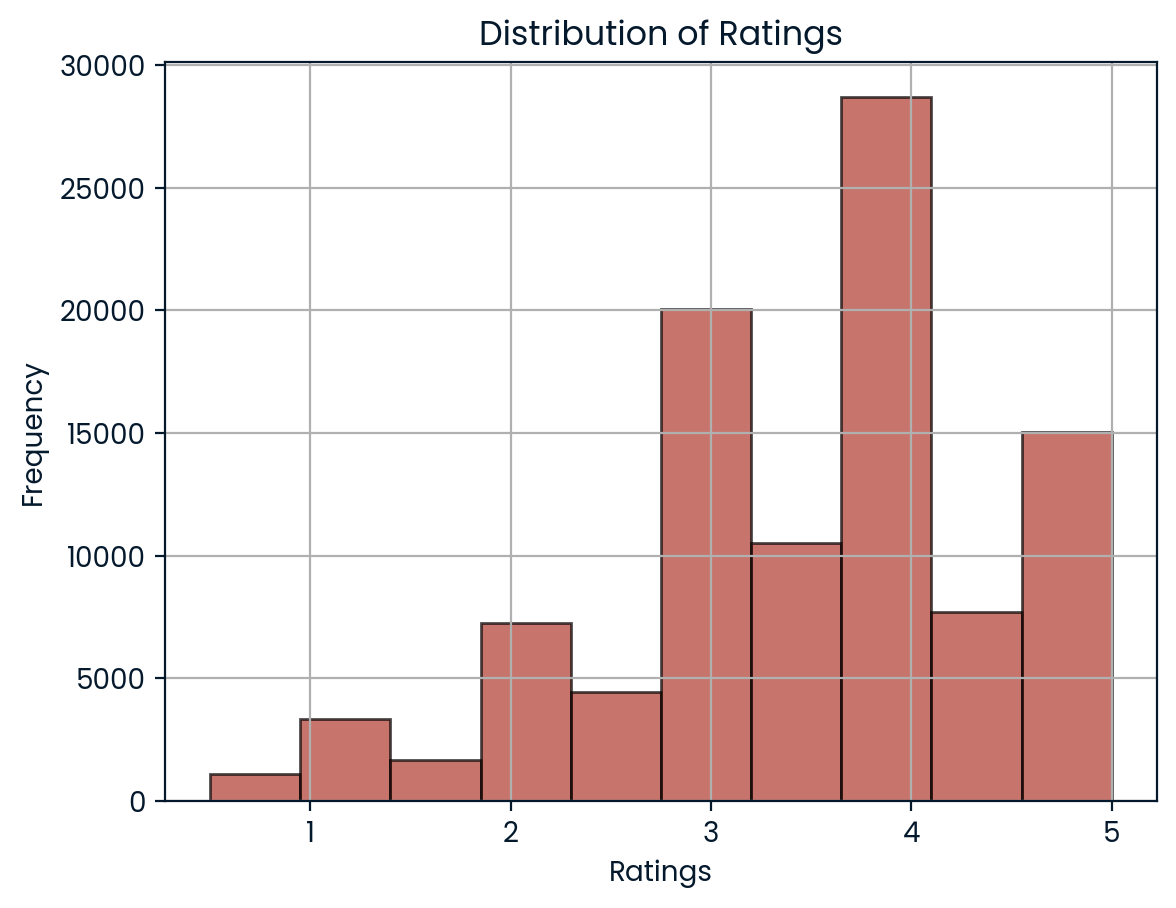

In [100]:
# function to visualize the columns 
def plot_column(plt,type, x,title, color, xlabel, ylabel):
    if type =="hist":
        plt.hist(x, bins=20, color=color,edgecolor='k', alpha=0.7)
    elif type =="bar":
        plt.bar(x,color=color,edgecolor='k')
    elif type =="hist2":
        plt.hist(x, bins=10, color=color,edgecolor='k', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


# visulizing the vote_average, vote_count and distributionof ratings
plot_column(plt,'hist', movies_metadata['vote_average'],"Distribution of Vote Average","#95a5a6","Vote Average", "Frequency")

plot_column(plt,"hist", movies_metadata['vote_count'],"Distribution of vote count", "#7d3c98", 'Vote Count', 'Frequency')

plot_column(plt,"hist2", rating['rating'], 'Distribution of Ratings','#b03a2e', 'Ratings', 'Frequency')

In [101]:
#functionto recommend movies based on vote_average and vote_count
def simple_recommender(movies_metadata, criterion='vote_average', top_n=10):
    if criterion not in ['vote_average','vote_count']:
        raise ValueError("Criterion must be either 'vote_average or vote_count")
                         
    #sort the movies based on specific criterion
    recommended_movies= movies_metadata.sort_values(by=criterion, ascending=False)
    
    #select the top N movies
    recommended_movies=recommended_movies[['movie_id','title', 'overview', criterion]].head(top_n)

    return recommended_movies
    

In [102]:
#example usage of the function
top_movies_by_vote_average = simple_recommender(movies_metadata, criterion='vote_average', top_n=5)
top_movies_by_vote_count = simple_recommender(movies_metadata, criterion='vote_count',top_n=5)
top_movies_by_vote_average

,movie_id,title,overview,vote_average
430,2751904.0,Survive and Advance,"In 1983, the NC State Wolfpack, coached by Jim...",10.0
2882,113270.0,"The Haunted World of Edward D. Wood, Jr.",The strange life and the wonderfully awful fil...,10.0
8907,114241.0,Reckless,"On Christmas eve, a relentlessly cheerful woma...",10.0
873,118925.0,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",10.0
6603,79278.0,Chilly Scenes of Winter,A man falls for a separated woman but can't co...,10.0


In [103]:
top_movies_by_vote_count

,movie_id,title,overview,vote_count
67,1375666.0,Inception,"Cobb, a skilled thief who commits corporate es...",14075.0
5577,468569.0,The Dark Knight,Batman raises the stakes in his war on crime. ...,12269.0
5761,499549.0,Avatar,"In the 22nd century, a paraplegic Marine is di...",12114.0
8033,848228.0,The Avengers,When an unexpected enemy emerges and threatens...,12000.0
6935,1431045.0,Deadpool,Deadpool tells the origin story of former Spec...,11444.0


In [104]:
def create_user_based_recommender(movies_metadata, rating, movie_title, top_n=10):
    #merge the movies_metadata and rating dataframe
    movies_ratings= pd.merge(movies_metadata, rating, on='movie_id')

    #create a pivot table with users as row, movies as column and ratings as values
    user_movie_rating=movies_ratings.pivot_table(values='rating', index='user_id', columns='title')

    #fill nan values with 0 assuming that the unrated movies have a rating of 0
    user_movie_rating.fillna(0, inplace=True)

    #compute the cosine similarity matrix
    movie_similarity= cosine_similarity(user_movie_rating.T)

    #covert the similarity matrix to dataframe
    movie_similarity_df = pd.DataFrame(movie_similarity, index=user_movie_rating.columns, columns=user_movie_rating.columns)

    #get the list of similar movies
    similar_movies = movie_similarity_df[movie_title].sort_values(ascending=False)[1:top_n+1]

    return similar_movies

In [105]:
#example usages
movie_title='Inception'
recommended_movies = create_user_based_recommender(movies_metadata, rating, movie_title, top_n=10)
recommended_movies

title
The Dark Knight          0.656999
Avatar                   0.633687
The Dark Knight Rises    0.589308
Inglourious Basterds     0.580237
District 9               0.576054
WALL·E                   0.564585
Shutter Island           0.563132
Interstellar             0.541433
Django Unchained         0.537544
Iron Man                 0.536134
Name: Inception, dtype: float64

In [106]:
#load the pre-trained model from sentence-transformer
model = SentenceTransformer("all-MiniLM-L6-v2")

In [107]:
#Since there are missing values on movie overview, ensure that it is filled with strings
movies_metadata['overview'] = movies_metadata['overview'].fillna("").astype(str)

In [108]:
#generate embedding for each movie overview
tqdm.pandas(desc="Generating embeddings")
movies_metadata['embedding'] = movies_metadata['overview'].progress_apply(lambda x: model.encode(x).tolist())

Generating embeddings: 100%|██████████| 9010/9010 [16:26<00:00,  9.13it/s]


In [109]:
movies_metadata.head()

,movie_id,title,overview,vote_average,vote_count,embedding
0,95765.0,Cinema Paradiso,"A filmmaker recalls his childhood, when he fel...",8.2,834.0,"[-0.05425610765814781, -0.03165525943040848, -..."
1,67116.0,The French Connection,Tough narcotics detective 'Popeye' Doyle is in...,7.4,435.0,"[-0.10362894833087921, -0.08074168115854263, -..."
2,80801.0,The Gods Must Be Crazy,Misery is brought to a small group of Sho in t...,7.1,251.0,"[-0.005189940333366394, 0.10656534135341644, 0..."
3,96446.0,Willow,Fearful of a prophecy stating that a girl chil...,6.9,484.0,"[-0.012960953637957573, 0.0008763579535298049,..."
4,112697.0,Clueless,"Shallow, rich and socially successful Cher is ...",6.9,828.0,"[0.009831280447542667, 0.01132123451679945, 0...."


In [110]:
def recommend_movies(description, n=5):
    #generate embedding for the user input description 
    user_embedding = model.encode(description).tolist()

    #calculate the cosine similarity between user embedding and all movie embeddings
    movies_metadata['similarity'] = movies_metadata['embedding'].apply(lambda x: cosine_similarity([user_embedding], [x])[0][0])

    #sort movies by similarity and get the top n recommendations
    recommendations = movies_metadata.sort_values(by='similarity', ascending=False).head(n)

    return recommendations[['title', 'overview', 'similarity']]
    

In [112]:
#example usage
user_description = 'A romantic comedy with lots of x-rated scenes'
recommendations = recommend_movies(user_description, n=5)
recommendations

,title,overview,similarity
3096,All Over the Guy,A contemporary romantic comedy exploring the u...,0.628737
6676,About Last Night,A modern reimagining of the classic romantic c...,0.614988
3537,Midnight in Paris,A romantic comedy about a family traveling to ...,0.606266
5796,Swimming Pool,In the middle of this amusing thriller is a re...,0.586817
5302,Your Friends & Neighbors,"This adult comedy follows six characters, thre...",0.581632


In [113]:
def combined_recommender(option, user_input=None, n=5): 
    if option == 'vote_average':
        return top_movies_by_vote_average.head(n)[['title', 'overview', 'vote_average']]
    
    elif option == 'vote_count':
        return top_movies_by_vote_count.head(n)[['title', 'overview', 'vote_count']]
    
    elif option == 'ratings':
        if user_input is None:
            raise ValueError("user_input must be provided for the 'ratings' option.")
        
        # Assuming a function get_similar_movies_by_title exists
        similar_movies = get_similar_movies_by_title(user_input, n)
        return similar_movies[['title', 'overview']]
    
    elif option == 'embedding':
        if user_input is None:
            raise ValueError("user_input must be provided for the 'embedding' option.")
        
        return recommend_movies(user_input, n)
    
    else:
        raise ValueError("Invalid option. Choose from 'vote_average', 'vote_count', 'ratings', 'embedding'.")



In [116]:
# Example usage:
#combined_recommender('vote_average', n=5)
# combined_recommender('vote_count', n=5)
# combined_recommender('ratings', user_input='The Matrix', n=5)
combined_recommender('embedding', user_input='An action adventures with herioc scenes', n=5)

,title,overview,similarity
540,The Star Maker,The adventures and deceptions of a photographe...,0.462678
6642,Lola Montès,The film tells the tragical story of the life ...,0.461834
3013,"Paris, je t'aime","Olivier Assayas, Gus Van Sant, Wes Craven and ...",0.439750
137,Tape,A three-character ensemble piece set within th...,0.421534
7418,L'Âge d'Or,The film consists of a series of tightly inter...,0.417615
